Data Fields<br>
datetime - hourly date + timestamp<br>  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>  
holiday - whether the day is considered a holiday<br>  
workingday - whether the day is neither a weekend nor holiday<br>  
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>  
temp - temperature in Celsius<br>  
atemp - "feels like" temperature in Celsius<br>  
humidity - relative humidity<br>  
windspeed - wind speed<br>  
casual - number of non-registered user rentals initiated<br>  
registered - number of registered user rentals initiated<br>  
count - number of total rentals<br>  

In [56]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [57]:
df=pd.read_csv("bike-sharing-data.csv")

In [58]:
df.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [59]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [60]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [61]:

df['datetime'] = df['datetime'].astype('datetime64')


In [62]:
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [63]:
df['weekday'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()
df['hour'] = df['datetime'].dt.hour


In [64]:
df.drop('datetime', axis='columns', inplace=True)


In [10]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,hour
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,December,19
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,December,20
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,December,21
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,December,22
10885,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,Wednesday,December,23


In [65]:
df.groupby('hour')['count'].sum()


hour
0      25088
1      15372
2      10259
3       5091
4       2832
5       8935
6      34698
7      96968
8     165060
9     100910
10     79667
11     95857
12    116968
13    117551
14    111010
15    115960
16    144266
17    213757
18    196472
19    143767
20    104204
21     79057
22     60911
23     40816
Name: count, dtype: int64

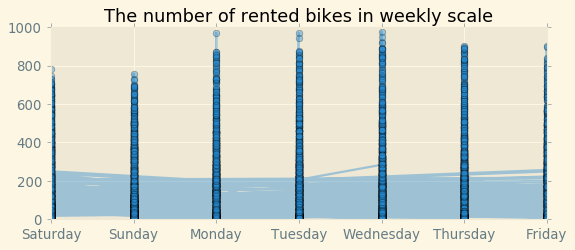

In [88]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
dfg=pd.DataFrame({'x_values': df['weekday'], 'y_values': df['count']})
plt.style.use( 'Solarize_Light2')
plt.rcParams["figure.figsize"] = (8,3)

# Cut your window in 1 row and 2 columns, and start a plot in the first part

plt.plot( 'x_values', 'y_values', marker='o', data=dfg, alpha=0.4)
plt.title("The number of rented bikes in weekly scale")
 
# And now add something in the second part:

fig = plt.gcf()
fig.savefig('weekgraph.png')

 
# Show the graph
plt.show()

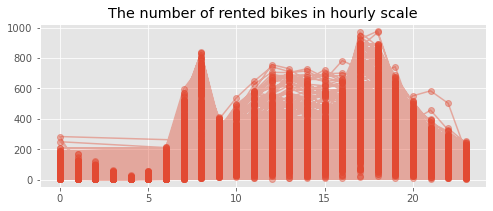

In [13]:
dfg=pd.DataFrame({'x_values': df['hour'], 'y_values': df['count']})
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,3)

# Cut your window in 1 row and 2 columns, and start a plot in the first part

plt.plot( 'x_values', 'y_values', data=dfg, marker='o', alpha=0.4)
plt.title("The number of rented bikes in hourly scale")
 
# And now add something in the second part:

fig = plt.gcf()
fig.savefig('hourgraph.png')

 
# Show the graph
plt.show()


In [14]:
import matplotlib.pyplot as plt

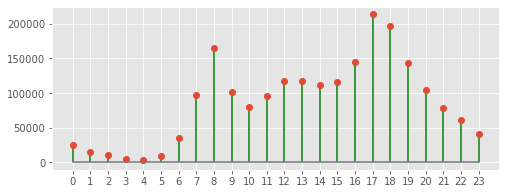

In [15]:
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']

plt.style.use('ggplot') 

h = df.groupby('hour')['count'].sum() #sum of counts per hour in a day

hour_df = pd.DataFrame(h)
#ordered_h = hour_df.sort_values(by='count')
my_range = range(len(hour_df.index))
plt.stem(hour_df['count'], linefmt='green');
plt.xticks( my_range, hour_df.index);


In [16]:
df['weekday'].value_counts()

Saturday     1584
Sunday       1579
Thursday     1553
Wednesday    1551
Monday       1551
Tuesday      1539
Friday       1529
Name: weekday, dtype: int64

In [17]:
df.groupby('weekday')['count'].sum()


weekday
Friday       302504
Monday       295296
Saturday     311518
Sunday       285546
Thursday     306401
Tuesday      291985
Wednesday    292226
Name: count, dtype: int64

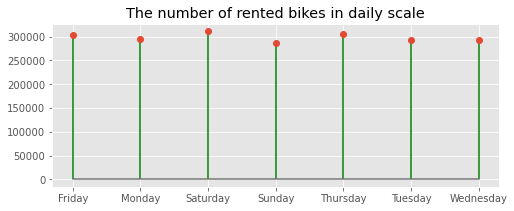

In [18]:

plt.style.use('ggplot') 

w = df.groupby('weekday')['count'].sum() #sum of counts per hour in a day

week_df = pd.DataFrame(w)
plt.title("The number of rented bikes in daily scale")
#ordered_h = hour_df.sort_values(by='count')
my_range = range(len(week_df.index))
plt.stem(week_df['count'], linefmt='green');
plt.xticks( my_range, week_df.index);


fig = plt.gcf()
fig.savefig('daily2.png')
plt.show()

In [19]:
df['month']

0         January
1         January
2         January
3         January
4         January
           ...   
10881    December
10882    December
10883    December
10884    December
10885    December
Name: month, Length: 10886, dtype: object

In [20]:
df.groupby('month')['count'].sum()

month
April        167402
August       213516
December     160160
February      99113
January       79884
July         214617
June         220733
March        133501
May          200147
November     176440
October      207434
September    212529
Name: count, dtype: int64

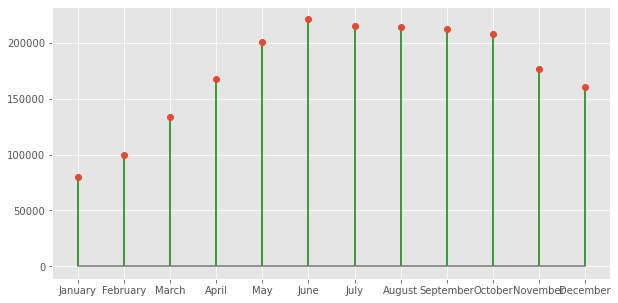

In [21]:

plt.style.use('ggplot') 
plt.rcParams["figure.figsize"] = (10,5)
month_values = ['January', 'February','March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December'] 

m = df.groupby('month')['count'].sum() #sum of counts per hour in a day

month_df = pd.DataFrame(m)#
month_df = month_df.reindex(month_values)


my_range = range(len(month_df.index))
plt.stem(month_df['count'], linefmt='green', );
plt.xticks( my_range, month_df.index);

In [22]:
#import matplotlib.pyplot as plt
#data = df.groupby('weekday')['casual'].sum()
#plt.pie(data.values , labels = data.index , shadow = True , autopct='%.2f' )
#plt.title('casual customer count per weekday')
#plt.show()

In [23]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'weekday',
       'month', 'hour'],
      dtype='object')

In [24]:
import seaborn as sns

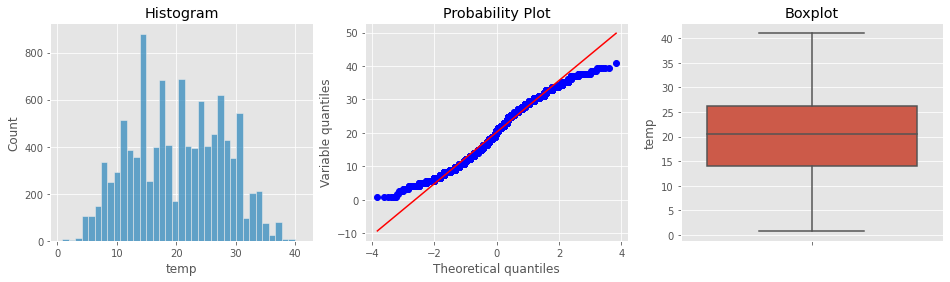

In [25]:
from scipy import stats

def diagnostic_plots( variable, df=df):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins='auto')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
diagnostic_plots('temp')

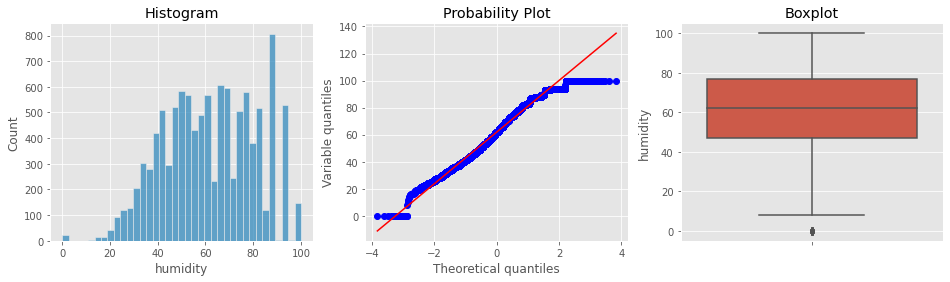

In [26]:
diagnostic_plots('humidity')

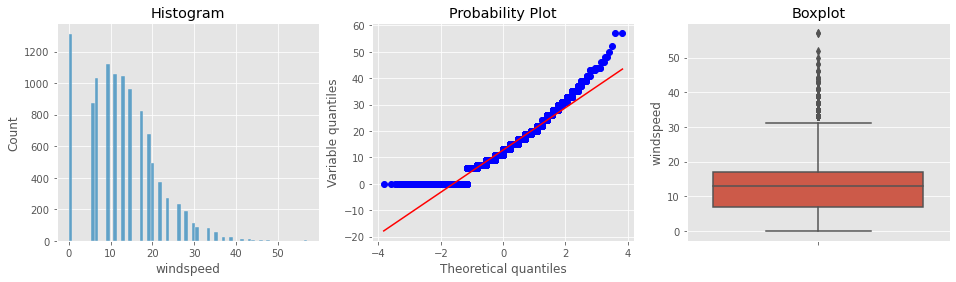

In [27]:
diagnostic_plots('windspeed')

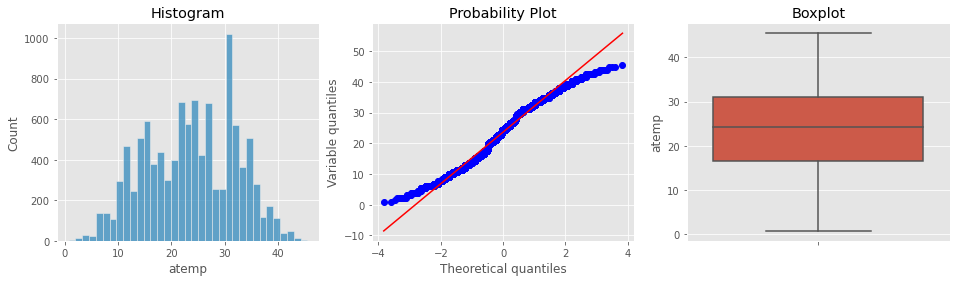

In [28]:
diagnostic_plots('atemp')

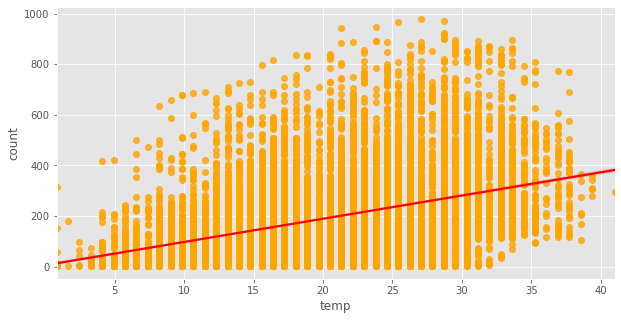

In [29]:
sns.regplot(x=df["temp"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('1.png')


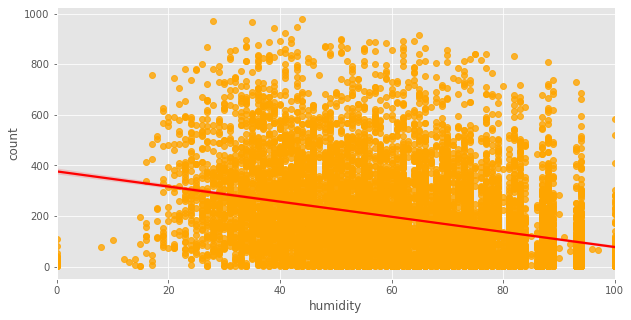

In [30]:
sns.regplot(x=df["humidity"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('2.png')

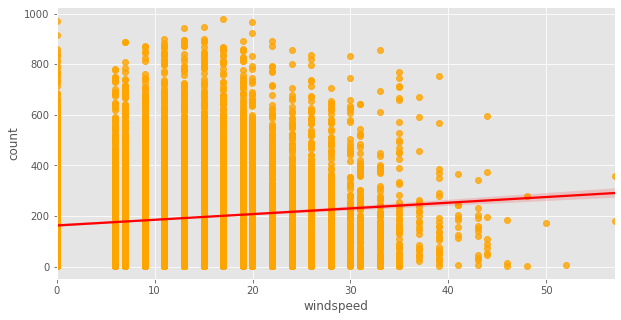

In [31]:
sns.regplot(x=df["windspeed"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('3.png')

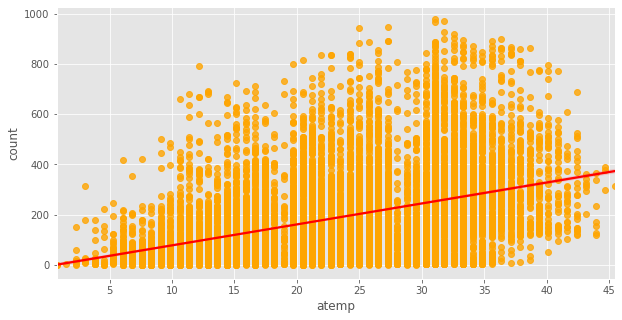

In [32]:
sns.regplot(x=df["atemp"], y=df["count"], line_kws={"color": "red"}, scatter_kws={"color": "orange"});
fig = plt.gcf()
fig.savefig('4.png')

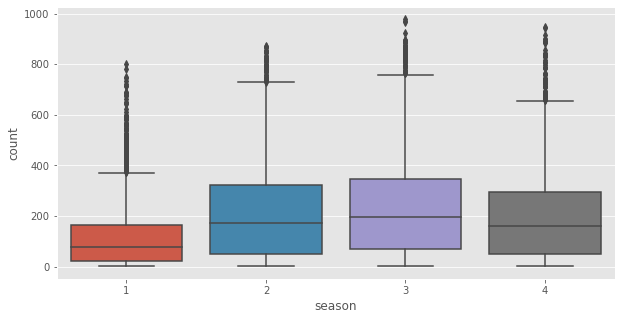

In [33]:
sns.boxplot( x=df["season"], y=df["count"] );

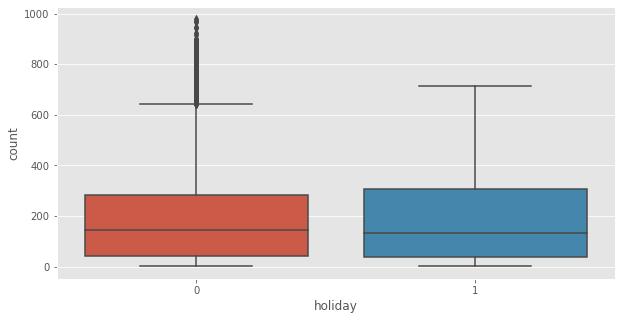

In [34]:
sns.boxplot( x=df["holiday"], y=df["count"] );

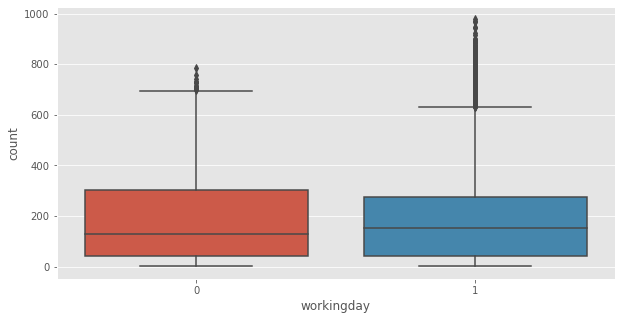

In [35]:
sns.boxplot( x=df["workingday"], y=df["count"] );

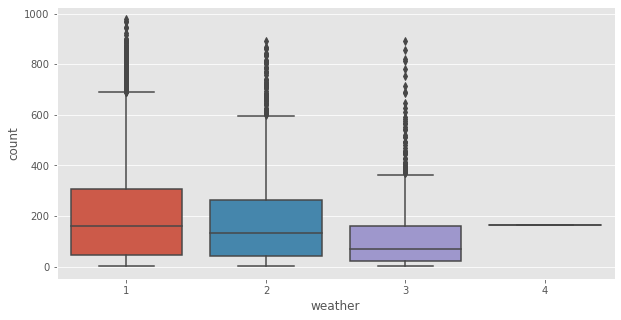

In [36]:
sns.boxplot( x=df["weather"], y=df["count"] );

In [37]:
from sklearn.preprocessing import PowerTransformer


In [38]:
pt = PowerTransformer()
df['temp'] = pt.fit_transform(df['temp'].values.reshape(-1, 1))


In [39]:
pt = PowerTransformer()
df['humidity'] = pt.fit_transform(df['humidity'].values.reshape(-1, 1))



In [40]:
pt = PowerTransformer()
df['windspeed'] = pt.fit_transform(df['windspeed'].values.reshape(-1, 1))

In [41]:
pt = PowerTransformer()
df['atemp'] = pt.fit_transform(df['atemp'].values.reshape(-1, 1))

In [42]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,month,hour
0,1,0,0,1,-1.354379,-1.092229,0.993161,-1.88383,3,13,16,Saturday,January,0
1,1,0,0,1,-1.471434,-1.182815,0.941223,-1.88383,8,32,40,Saturday,January,1
2,1,0,0,1,-1.471434,-1.182815,0.941223,-1.88383,5,27,32,Saturday,January,2
3,1,0,0,1,-1.354379,-1.092229,0.681516,-1.88383,3,10,13,Saturday,January,3
4,1,0,0,1,-1.354379,-1.092229,0.681516,-1.88383,0,1,1,Saturday,January,4


In [43]:
# casual ve registered toplmi count'a esit oldugundan lineer'ligi bozmak icin registered degiskenini sildik...

In [44]:
df.drop('registered', axis=1, inplace=True)

In [45]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,weekday,month,hour
0,1,0,0,1,-1.354379,-1.092229,0.993161,-1.88383,3,16,Saturday,January,0
1,1,0,0,1,-1.471434,-1.182815,0.941223,-1.88383,8,40,Saturday,January,1
2,1,0,0,1,-1.471434,-1.182815,0.941223,-1.88383,5,32,Saturday,January,2
3,1,0,0,1,-1.354379,-1.092229,0.681516,-1.88383,3,13,Saturday,January,3
4,1,0,0,1,-1.354379,-1.092229,0.681516,-1.88383,0,1,Saturday,January,4


In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
scaler = StandardScaler()


In [48]:
df['casual'] = scaler.fit_transform(df['casual'].values.reshape(-1, 1))


In [49]:
df['casual']

0       -0.660992
1       -0.560908
2       -0.620958
3       -0.660992
4       -0.721042
           ...   
10881   -0.580925
10882   -0.520875
10883   -0.640975
10884   -0.480841
10885   -0.640975
Name: casual, Length: 10886, dtype: float64

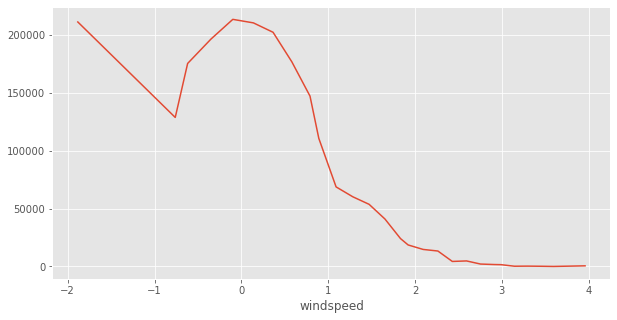

In [52]:
df.groupby('windspeed')['count'].sum().plot()
fig = plt.gcf()
fig.savefig('5.png')

In [51]:
sum(df['count'])


2085476

In [119]:
df.groupby('windspeed')['count'].sum()

windspeed
0.0000     211526
6.0032     128938
7.0015     175627
8.9981     196723
11.0014    213791
12.9980    210744
15.0013    202611
16.9979    177034
19.0012    147403
19.9995    110816
22.0028     68840
23.9994     60283
26.0027     53755
27.9993     41021
30.0026     24106
31.0009     18597
32.9975     14726
35.0008     13349
36.9974      4335
39.0007      4776
40.9973      2083
43.0006      1655
43.9989      1539
46.0022       202
47.9988       281
50.0021       171
51.9987         5
56.9969       539
Name: count, dtype: int64

In [133]:
df.groupby('windspeed')['temp'].mean()

windspeed
0.0000     19.801158
6.0032     19.637683
7.0015     20.044004
8.9981     20.439232
11.0014    20.621798
12.9980    20.930461
15.0013    21.142518
16.9979    20.971699
19.0012    20.688018
19.9995    20.515000
22.0028    18.397097
23.9994    19.787737
26.0027    18.891404
27.9993    19.166952
30.0026    18.933874
31.0009    18.325618
32.9975    19.567250
35.0008    17.898621
36.9974    16.064545
39.0007    18.677778
40.9973    18.114545
43.0006    19.748333
43.9989    15.682500
46.0022    13.940000
47.9988    13.120000
50.0021    18.040000
51.9987    12.300000
56.9969    32.800000
Name: temp, dtype: float64

<AxesSubplot:xlabel='windspeed'>

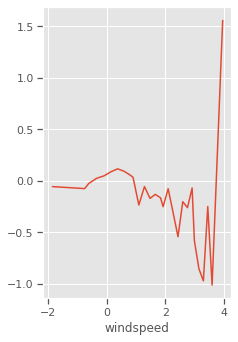

In [149]:
df.groupby('windspeed')['temp'].mean().plot()

In [150]:
mask1 = (0<=df['windspeed'])


In [151]:
mask2  =(df['windspeed']<=7)


In [152]:
df[mask1&mask2]['temp'].min()


-2.7806738257999193

In [153]:
df[mask1&mask2]['temp'].max()

2.3233487775677957

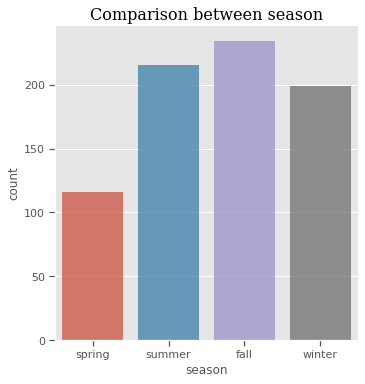

In [161]:
sns.catplot(data = df.replace({'season':{1:'spring' , 2:'summer' , 3:'fall' , 4:'winter'}} , inplace = False)\
           , x = 'season' , y = 'count' , kind = 'bar' , ci = None ,  alpha = 0.8)
plt.title('Comparison between season' , fontdict = {'family':'serif' , 'size':16});


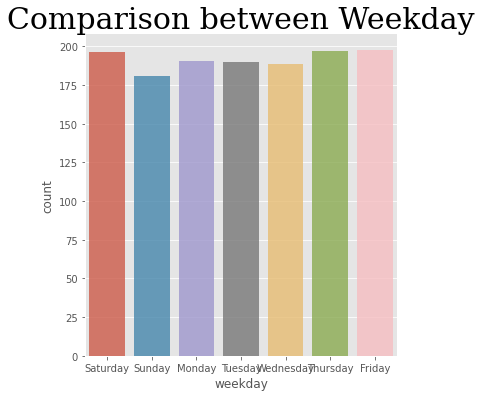

In [55]:
sns.catplot(data = df.replace({'weekday':{1:'Monday' , 2:'Tuesday' , 3:'Wednesday' , 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}} , inplace = False)\
           , x = 'weekday' , y = 'count' , kind = 'bar' , ci = None ,  alpha = 0.8)
plt.title('Comparison between Weekday' , fontdict = {'family':'serif' , 'size':30});


<AxesSubplot:>

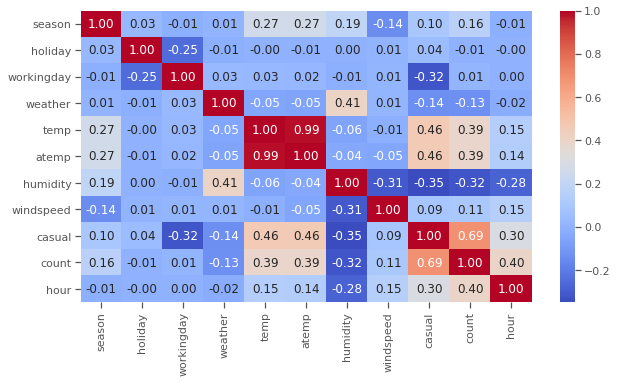

In [165]:
corr = df.corr()
plt.figure(figsize = (9,5))
sns.heatmap(corr , cmap = 'coolwarm' , annot=True , fmt = '.2f')

In [166]:
df.drop('temp', axis=1, inplace=True)

In [167]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'casual', 'count', 'weekday', 'month', 'hour'],
      dtype='object')

In [168]:
days = pd.get_dummies(df['weekday'], drop_first=True)


In [169]:
days

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
10881,0,0,0,0,0,1
10882,0,0,0,0,0,1
10883,0,0,0,0,0,1
10884,0,0,0,0,0,1


In [170]:
df = pd.concat([df, days], axis=1)


In [171]:
X = df.drop(['weekday', 'month', 'count'], axis='columns')


In [172]:
y = df['count']


In [174]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.model_selection import train_test_split


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [178]:
lr = LinearRegression()


In [179]:
lr.fit(X_train, y_train)


LinearRegression()

In [180]:
lr.score(X_test, y_test)


0.5965054390923548

In [181]:
from sklearn import metrics


best k: 8  with r2_score =  0.8762471186105659


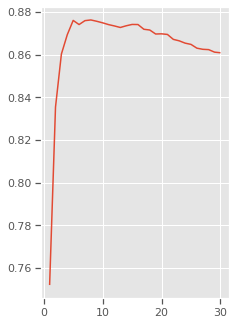

In [182]:
from sklearn.neighbors import KNeighborsRegressor

# lets do this with trial and error for finding the best k
acc = [] # accuracy per k (by accuracy i mean r2_score)
max_r2 = 0
best_k = 0
for k in range(1,31):
    knr = KNeighborsRegressor(n_neighbors = k)
    knr.fit(X_train , y_train)
    knr_pred = knr.predict(X_test)
    r2 = metrics.r2_score(y_test , knr_pred)
    acc.append(r2)
    if r2 > max_r2:
        max_r2 = r2
        best_k = k

print("best k:",best_k , " with r2_score = " , max_r2)
plt.plot(np.arange(1,31) , acc)

best min_samples_leaf: 15  with r2_score =  0.8970184031852906


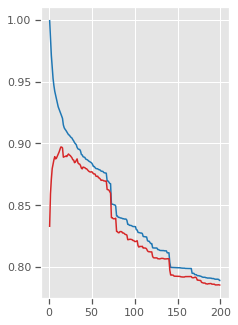

In [183]:
from sklearn.tree import DecisionTreeRegressor

# lets find the best min_samples_leaf with trial and error
acc_test = [] # accuracy per k (by accuracy i mean r2_score)
acc_train = []
max_r2_test = 0
best_k_test = 0
for k in range(1,201):
    rt = DecisionTreeRegressor(min_samples_leaf = k , random_state = 1)
    rt.fit(X_train , y_train)
    rt_pred_train = rt.predict(X_train)
    rt_pred_test = rt.predict(X_test)
    r2_train = metrics.r2_score(y_train , rt_pred_train)
    r2_test = metrics.r2_score(y_test , rt_pred_test)
    acc_test.append(r2_test)
    acc_train.append(r2_train)
    if r2_test > max_r2_test:
        max_r2_test = r2_test
        best_k_test = k

print("best min_samples_leaf:",best_k_test , " with r2_score = " , max_r2_test)
plt.plot(np.arange(1,201) , acc_train , color = 'tab:blue')
plt.plot(np.arange(1,201) , acc_test , color = 'tab:red')

In [184]:
from sklearn.ensemble import RandomForestRegressor



In [185]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train).score(X_test, y_test)


0.9122533312025441

In [186]:
from sklearn.neighbors import KNeighborsRegressor


In [188]:
K = range(2, 20)
max_score = 0
n_neighbors = 0
for k in K:
    knn = KNeighborsRegressor(n_neighbors=k)
    if knn.fit(X_train, y_train).score(X_test, y_test) > max_score:
        max_score = knn.fit(X_train, y_train).score(X_test, y_test)
        n_neighbors = k
print(max_score, k)


0.8762471186105659 19
